Load and Inspect data


In [1]:
import pandas as pd

teams = pd.read_csv("Teams.csv")
teams.head()


,Rank,Team,Gold,Silver,Bronze,S Tier,Earnings
0,1,Sentinels,12,3,1,1,"$561,500"
1,2,Acend,5,1,1,1,"$498,859"
2,3,Gambit Esports,8,3,0,1,"$495,638"
3,4,Team Liquid,4,2,2,0,"$295,374"
4,5,G2 Esports,7,2,1,0,"$257,925"


Data Cleaning

In [2]:
teams.isnull().sum()

,0
Rank,0
Team,0
Gold,0
Silver,0
Bronze,0
S Tier,0
Earnings,0


In [3]:
teams.fillna(0, inplace=True)

In [9]:
teams['Earnings'] = (
    teams['Earnings']
    .str.replace('$', '', regex=False)
    .str.replace(',', '', regex=False)
    .astype(float)
)

Creating target Variable

In [10]:
teams['Winner'] = teams['Rank'].apply(lambda x: 1 if x <= 10 else 0)

Feature Selection

In [25]:
features = ['Gold', 'Silver', 'Bronze']
X = teams[features]
y = teams['Winner']

Train Test Split

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

Model 1 - Logistic Regression

In [20]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression(
    max_iter=1000,
    class_weight='balanced'
)
log_model.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000)

In [21]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = log_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.801980198019802
              precision    recall  f1-score   support

           0       0.99      0.80      0.89        97
           1       0.14      0.75      0.23         4

    accuracy                           0.80       101
   macro avg       0.56      0.78      0.56       101
weighted avg       0.95      0.80      0.86       101



Model 2 - Standerd Scalar

In [27]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [28]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression(
    max_iter=1000,
    class_weight='balanced'
)

log_model.fit(X_train_scaled, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000)

Model Predicition and Accuracy test

In [29]:
y_pred = log_model.predict(X_test_scaled)


In [30]:
from sklearn.metrics import accuracy_score
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.801980198019802


Predicting the new team

In [38]:
new_team = pd.DataFrame({
    'Gold': [5],
    'Silver': [1],
    'Bronze': [1]
})

In [39]:
new_team_scaled = scaler.transform(new_team)


In [40]:
prediction = log_model.predict(new_team_scaled)
probability = log_model.predict_proba(new_team_scaled)

print("Prediction:", "Winner" if prediction[0] == 1 else "Loser")
print("Probability of Winner:", probability[0][1])

Prediction: Winner
Probability of Winner: 0.6006933540958976


Features Importance

In [41]:
# features used in model
features = ['Gold', 'Silver', 'Bronze']

In [42]:
importance = log_model.coef_[0]

feature_importance = pd.DataFrame({
    'Feature': features,
    'Importance': importance
}).sort_values(by='Importance', ascending=False)

feature_importance

,Feature,Importance
0,Gold,0.897262
2,Bronze,0.595336
1,Silver,-0.459018


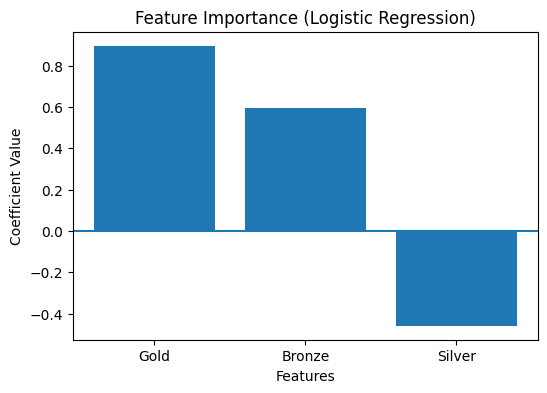

In [43]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
plt.bar(feature_importance['Feature'], feature_importance['Importance'])
plt.xlabel("Features")
plt.ylabel("Coefficient Value")
plt.title("Feature Importance (Logistic Regression)")
plt.axhline(0)  # reference line
plt.show()


“Since logistic regression coefficients are learned conditionally, Silver medals showed a negative coefficient when controlling for Gold and Bronze. This indicates that teams with many silver finishes but fewer wins were less likely to be S-Tier champions